# Ієрархічна кластеризація.
Черних Максим

# Завдання
1. Реалізувати ієрархічну кластеризацію.
2. Вивести таблицю об'єднання кластерів та дендрограму
3. З набору даних відібрати 20 випадкових об'єктів та провести кластерний аналіз.
4. Зробити висновки з обов'язковим вказанням оптимальної кількості кластерів.


# Реалізація алгоритму ієрархічної кластерізації.

Iмпортування необхідних для роботи бібліотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.cluster.hierarchy as hcluster
from sklearn.decomposition import PCA

Завантаження датасету смертності від травм згідно варіанту

In [ ]:
pd.read_excel(f"InjuryDeath.xlsx",)

,age,inj_dth,childyrs,age_mom,lbw,educ_mom,income,illegit,oth_chld,race_mom,pnclate
0,0,0,28.294319,24,1,15,3,1,0,0,0
1,0,0,0.091718,24,1,11,2,1,2,0,1
2,1,0,20.000000,24,1,15,3,0,3,0,0
3,0,0,10.000000,30,1,16,1,1,2,1,0
4,0,0,10.000000,30,1,12,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
15181,4,0,18.535250,19,1,12,2,1,0,1,1
15182,0,0,31.711157,24,0,11,5,1,1,0,1
15183,2,0,23.915127,30,0,16,4,0,0,0,1
15184,0,0,15.544147,29,0,16,1,1,1,1,1


Нормування даних

In [ ]:
def df_dataset():
  df = pd.read_excel(f"InjuryDeath.xlsx", usecols = ['childyrs', 'oth_chld', 'lbw'])
  df = df.dropna()
  columns = df.columns.tolist()
  for col in df.columns.tolist():
        df[col] = (df[col] - np.min(df[col])) / (np.max(df[col]) - np.min(df[col]))

  return df, df.columns.tolist(), df.values

In [ ]:
data, col, points = df_dataset()
data

,childyrs,lbw,oth_chld
0,0.004531,1.0,0.00
1,0.000015,1.0,0.50
2,0.003203,1.0,0.75
3,0.001601,1.0,0.50
4,0.001601,1.0,0.00
...,...,...,...
15181,0.002968,1.0,0.00
15182,0.005078,0.0,0.25
15183,0.003830,0.0,0.00
15184,0.002489,0.0,0.25


Вибiрка з 20 випадкових об'єктiв

In [ ]:
random_choice = np.random.choice(list(range(data.shape[0])), 20)

index = []

for i in random_choice:
    index.append(i)


df = pd.DataFrame(data, index=index, columns=col)


In [ ]:
df


,childyrs,lbw,oth_chld
2304,0.018705,0.0,0.00
7258,0.015497,0.0,0.25
14695,0.015836,0.0,0.00
6060,0.003203,0.0,0.50
7585,0.010127,0.0,0.25
617,0.026805,0.0,0.25
704,0.000530,0.0,0.00
5150,0.093560,0.0,0.00
6547,0.004804,1.0,0.75
1020,0.008232,1.0,0.25


Запуск тренувальних даних

In [ ]:
linkage=hcluster.linkage(
        df[col],
        method='centroid')


In [ ]:
Матриця поєднання даних та дендограмма 

{'color_list': ['g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'b'],
 'dcoord': [[0.0, 0.0032041342619206, 0.0032041342619206, 0.0],
  [0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0011575658529629166, 0.0011575658529629166, 0.0],
  [0.0, 0.007460601506218145, 0.007460601506218145, 0.0011575658529629166],
  [0.0, 0.25001682514585355, 0.25001682514585355, 0.007460601506218145],
  [0.0032041342619206,
   0.7000052435528579,
   0.7000052435528579,
   0.25001682514585355],
  [0.0, 0.0010709679062378945, 0.0010709679062378945, 0.0],
  [0.0, 0.002868593679311547, 0.002868593679311547, 0.0],
  [0.0010709679062378945,
   0.016204884427852534,
   0.016204884427852534,
   0.002868593679311547],
  [0.0, 0.08439158327120799, 0.08439158327120799, 0.016204884427852534],
  [0.0, 0.00024883282103069053, 0.00024883282103069053, 0.0],
  [0.0, 0.002925156423617887, 0.002925156423617887, 0.00024883282103069053],
  [0.0, 0.005369309738192458,

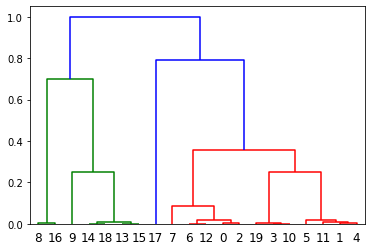

In [ ]:
hcluster.dendrogram(linkage)

З графіком бачимо, що потрібно використувати 3 кластери

Запуск ієрархічної кластерізації

In [ ]:
pTarget=hcluster.fcluster(
        linkage,3,
        criterion='maxclust')

In [ ]:
Статистичний перетин вибірки

In [ ]:
pd.crosstab(pTarget,pTarget)

col_0,1,2,3
row_0,,,
1,7,0,0
2,0,12,0
3,0,0,1


Середні значення та побудова гістаграми значень кожної змінної кожного кластера

In [ ]:
dMean = pd.DataFrame (columns = col + ['Classification'])
data_gb=df[col].groupby(pTarget)

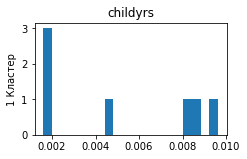

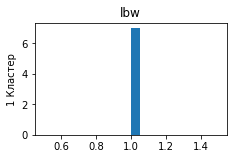

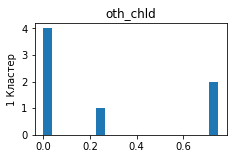

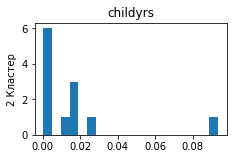

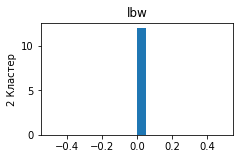

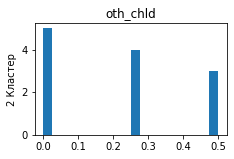

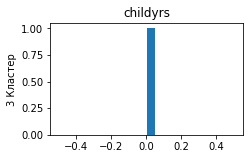

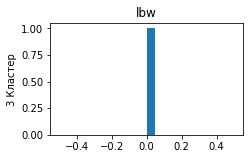

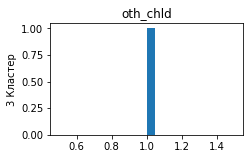

In [ ]:
i=0;
for g in data_gb.groups:
    rMean=data_gb.get_group(g).mean()
    rMean ['Classification'] = g
    dMean=dMean.append(rMean,ignore_index=True)
    subData=data_gb.get_group(g)
    for column in col:
        i=i+1
        fig = plt.figure(figsize = (20, 7))
        p=plt.subplot(3,5,i)
        p.set_title(column)
        p.set_ylabel (str (g) + " Кластер")
        plt.hist(subData[column],bins=20)

# Висновок

У даній роботі було представлено ієрархічний алгоритм кластерізації за допомогою бібліотеки scipy та sklearn.

На дендограмі бачимо, що потрібно робити кластерізацію за трьома кластерами та виявили, що один об'єкт тав кластером (мабуть через сильну віддаленість та неоднорідність з іншими об'єктами.

Також побудовані гістограми кожного кластера із середніми змінними, бачимо що це дійсно так, тому що у різних кластерах значення якісноіі змінноіі (0 в одному та 1 в іншому).